#Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import cv2
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, precision_score, f1_score, recall_score
from tensorflow.keras.applications import ResNet50, InceptionV3
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, BatchNormalization
from tensorflow.keras.layers import Input, concatenate, Activation, Flatten, ZeroPadding2D,Add, AveragePooling2D
from tensorflow.keras.models import Model, load_model

#Loading, and Normalizing the Images

In [ ]:
def load_images(folder_path, categories):
  images = []
  image_labels = []
  for category in categories:
    path = os.path.join(folder_path,category)
    label = categories.index(category)
    for image in os.listdir(path):
      if image is not None:
        img = cv2.imread(os.path.join(path,image)) 
        img = cv2.resize(img, (128,128)) # resizing to (128,128)
        images.append(img)
        image_labels.append(label)
      else:
        pass
  images = (np.array(images))/255 #converting to array and normalizing images
  image_labels = np.array(image_labels)
  return images,image_labels

In [ ]:
folder_path = "/content/drive/MyDrive/Virtual Consultant (FYP)/Covid Detection"
categories = ["Normal","Covid"] #2000 images of each class 

images, image_labels = load_images(folder_path, categories)
images = np.expand_dims(images, axis = -1)

#Loading the Tabular Data

In [ ]:
tabular_data = pd.read_csv("/content/drive/MyDrive/Virtual Consultant (FYP)/Covid Tabular Data/Covid19TabularData.csv")
tabular_data.shape

(4000, 11)

#Separting the Input and Output variable of Tabular Data

In [ ]:
tabular_input = tabular_data.drop("corona_result",axis = 1)
tabular_labels = (tabular_data["corona_result"])

In [ ]:
tabular_input = np.expand_dims(tabular_input, axis = 2)

#Looking at the shape of data

In [ ]:
print(images.shape)
print(image_labels.shape)
print(tabular_input.shape)
print(tabular_labels.shape)

(4000, 128, 128, 3)
(4000,)
(4000, 10, 1)
(4000,)


#Comparing the Labels of Images and Tabular Data

In [ ]:
print("<---------------------------Images Labels---------------------->")
print("Image Number 1 Label:",image_labels[0])
print("Image Number 2000 Label:",image_labels[1999])
print("Image Number 2001 Label:",image_labels[2000])
print("Image Number 4000 Label:",image_labels[3999])


print("<---------------------------Tabular Data Labels---------------------->")
print("Record Number 1 Label:",tabular_labels[0]) 
print("Record Number 2000 Label:",tabular_labels[1999])
print("Record Number 2001 Label:",tabular_labels[2000])
print("Record Number 4000 Label:",tabular_labels[3999])

<---------------------------Images Labels---------------------->
Image Number 1 Label: 0
Image Number 2000 Label: 0
Image Number 2001 Label: 1
Image Number 4000 Label: 1
<---------------------------Tabular Data Labels---------------------->
Record Number 1 Label: 0.0
Record Number 2000 Label: 0.0
Record Number 2001 Label: 1.0
Record Number 4000 Label: 1.0


#Spliting the Data into Train and Test

In [ ]:
X_train_image,X_test_image,X_train_tabular,X_test_tabular,Y_train,Y_test = train_test_split(images,
                                                                                            tabular_input,
                                                                                            image_labels,
                                                                                            test_size = 0.2,
                                                                                            random_state = 45)
"""
Both labels (image_labels and tabular_labels) are in same order we can use anyone of them
I have used image_labels
"""

'\nBoth labels (image_labels and tabular_labels) are in same order we can use anyone of them\nI have used image_labels\n'

#Convolutional Neural Network (Used for Deployment)

*   Conv2D for Images
*   Dense Layers for Tabular Data



In [ ]:
def CNN_Model(image_shape = (128,128,3), tabular_shape = (10,)):
  #Layers for Image
  image_input_layer = Input(shape = image_shape)
  x = Conv2D(filters = 16, kernel_size = (3,3), padding = "same", strides = 2, activation = "relu")(image_input_layer)
  x = MaxPooling2D(pool_size = (2,2))(x)

  x = Conv2D(filters = 32, kernel_size = (3,3), padding = "same", strides = 2, activation = "relu")(x)
  x = Conv2D(filters = 32, kernel_size = (3,3), padding = "same", strides = 1, activation = "relu")(x)
  x = MaxPooling2D(pool_size = (2,2))(x)

  x = Conv2D(filters = 64, kernel_size = (3,3), padding = "same", strides = 2, activation = "relu")(x)
  x = Conv2D(filters = 64, kernel_size = (3,3), padding = "same", strides = 1, activation = "relu")(x)
  x = Conv2D(filters = 64, kernel_size = (3,3), padding = "same", strides = 1, activation = "relu")(x)
  x = MaxPooling2D(pool_size = (2,2))(x)

  x = Conv2D(filters = 128, kernel_size = (3,3), padding = "same", strides = 2, activation = "relu")(x)
  x = Conv2D(filters = 128, kernel_size = (3,3), padding = "same", strides = 1, activation = "relu")(x)
  x = MaxPooling2D(pool_size = (2,2), padding = "same")(x)

  x = Conv2D(filters = 256, kernel_size = (3,3), padding = "same", strides = 2, activation = "relu")(x)
  x = Conv2D(filters = 256, kernel_size = (3,3), padding = "same", strides = 1, activation = "relu")(x)
  x = Conv2D(filters = 256, kernel_size = (3,3), padding = "same", strides = 1, activation = "relu")(x)
  x = MaxPooling2D(pool_size = (2,2), padding = "same")(x)

  x = Conv2D(filters = 128, kernel_size = (3,3), padding = "same", strides = 2, activation = "relu")(x)
  x = Conv2D(filters = 64, kernel_size = (3,3), padding = "same", strides = 1, activation = "relu")(x)
  x = MaxPooling2D(pool_size = (2,2), padding = "same")(x)

  flat = Flatten()(x)


  #Layers for Tabular Data
  tabular_input_layer = Input(shape = tabular_shape)
  dense = Dense(128, activation = "relu")(tabular_input_layer)
  dense = Dense(64,activation = "relu")(dense)
  dense = Dense(32,activation = "relu")(dense)
  dense = Dense(16,activation = "relu")(dense)
  dense = Dense(8,activation = "relu")(dense)


  concat = concatenate([flat,dense])
  dense = Dense(4,activation = "relu")(concat)
  output_layer = Dense(1,activation = "sigmoid")(dense)

  model = Model(inputs = [image_input_layer, tabular_input_layer], outputs = output_layer)
  return model

In [ ]:
model = CNN_Model()
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
history = model.fit([X_train_image,X_train_tabular],Y_train,epochs = 60, batch_size = 128) 

Epoch 1/60
25/25 [==============================] - 31s 1s/step - loss: 0.6346 - accuracy: 0.7534
Epoch 2/60
25/25 [==============================] - 23s 882ms/step - loss: 0.4811 - accuracy: 0.8094
Epoch 3/60
25/25 [==============================] - 22s 864ms/step - loss: 0.4545 - accuracy: 0.8087
Epoch 4/60
25/25 [==============================] - 22s 862ms/step - loss: 0.4511 - accuracy: 0.8097
Epoch 5/60
25/25 [==============================] - 22s 867ms/step - loss: 0.4387 - accuracy: 0.8106
Epoch 6/60
25/25 [==============================] - 22s 885ms/step - loss: 0.3524 - accuracy: 0.8284
Epoch 7/60
25/25 [==============================] - 22s 871ms/step - loss: 0.2793 - accuracy: 0.8628
Epoch 8/60
25/25 [==============================] - 22s 897ms/step - loss: 0.2458 - accuracy: 0.8881
Epoch 9/60
25/25 [==============================] - 22s 869ms/step - loss: 0.2312 - accuracy: 0.9016
Epoch 10/60
25/25 [==============================] - 22s 871ms/step - loss: 0.1937 - accuracy:

In [ ]:
model.evaluate([X_test_image,X_test_tabular],Y_test)

25/25 [==============================] - 1s 39ms/step - loss: 0.1858 - accuracy: 0.9700


[0.18581178784370422, 0.9700000286102295]

## Confusion Matrix

[]

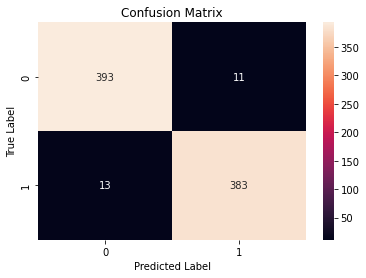

In [ ]:
y_pred_cnn = model.predict([X_test_image,X_test_tabular])
y_pred_cnn = np.round(y_pred_cnn)
y_pred_cnn = np.ravel(y_pred_cnn)

cm = confusion_matrix(Y_test,y_pred_cnn)

sns.heatmap(cm,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.savefig("/content/drive/MyDrive/Virtual Consultant (FYP)/Covid Tabular Data/Confusion Matrix of CNN.png",dpi = 1200)
plt.plot()

## Training Loss & Accuracy

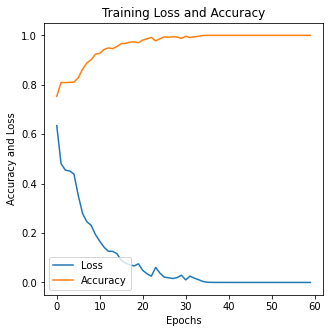

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(history.history['loss'])

plt.plot(history.history['accuracy'])
plt.title('Training Loss and Accuracy')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epochs')
plt.legend(['Loss', 'Accuracy'], loc='lower left')
plt.show()

In [ ]:
#model.save("/content/drive/MyDrive/Virtual Consultant (FYP)/Covid Tabular Data/cnn_with 97%.h5")

#Convolutional Neural Network


*   Conv2D for Images
*   Conv1D for Tabular Data



In [ ]:
def CNN_Model(image_shape = (128,128,3), tabular_shape = (10,1)):
  #Layers for Image
  image_input_layer = Input(shape = image_shape)
  x = Conv2D(filters = 16, kernel_size = (3,3), padding = "same", strides = 2, activation = "relu")(image_input_layer)
  x = MaxPooling2D(pool_size = (2,2))(x)

  x = Conv2D(filters = 32, kernel_size = (3,3), padding = "same", strides = 2, activation = "relu")(x)
  x = Conv2D(filters = 32, kernel_size = (3,3), padding = "same", strides = 1, activation = "relu")(x)
  x = MaxPooling2D(pool_size = (2,2))(x)

  x = Conv2D(filters = 64, kernel_size = (3,3), padding = "same", strides = 2, activation = "relu")(x)
  x = Conv2D(filters = 64, kernel_size = (3,3), padding = "same", strides = 1, activation = "relu")(x)
  x = Conv2D(filters = 64, kernel_size = (3,3), padding = "same", strides = 1, activation = "relu")(x)
  x = MaxPooling2D(pool_size = (2,2))(x)

  x = Conv2D(filters = 128, kernel_size = (3,3), padding = "same", strides = 2, activation = "relu")(x)
  x = Conv2D(filters = 128, kernel_size = (3,3), padding = "same", strides = 1, activation = "relu")(x)
  x = MaxPooling2D(pool_size = (2,2), padding = "same")(x)

  x = Conv2D(filters = 256, kernel_size = (3,3), padding = "same", strides = 2, activation = "relu")(x)
  x = Conv2D(filters = 256, kernel_size = (3,3), padding = "same", strides = 1, activation = "relu")(x)
  x = Conv2D(filters = 256, kernel_size = (3,3), padding = "same", strides = 1, activation = "relu")(x)
  x = MaxPooling2D(pool_size = (2,2), padding = "same")(x)

  x = Conv2D(filters = 128, kernel_size = (3,3), padding = "same", strides = 2, activation = "relu")(x)
  x = Conv2D(filters = 64, kernel_size = (3,3), padding = "same", strides = 1, activation = "relu")(x)
  x = MaxPooling2D(pool_size = (2,2), padding = "same")(x)

  image_flat = Flatten()(x)


  #Layers for Tabular Data
  tabular_input_layer = Input(shape = tabular_shape)
  y = Conv1D(filters = 16, kernel_size = 3, padding = "same", strides = 2, activation = "relu")(tabular_input_layer)
  y = MaxPooling1D(pool_size = 2,padding = "same")(y)

  y = Conv1D(filters = 32, kernel_size = 3, padding = "same", strides = 2, activation = "relu")(y)
  y = Conv1D(filters = 32, kernel_size = 3, padding = "same", strides = 1, activation = "relu")(y)
  y = MaxPooling1D(pool_size = 2,padding = "same")(y)

  y = Conv1D(filters = 64, kernel_size = 3, padding = "same", strides = 2, activation = "relu")(y)
  y = Conv1D(filters = 64, kernel_size = 3, padding = "same", strides = 1, activation = "relu")(y)
  y = Conv1D(filters = 64, kernel_size = 3, padding = "same", strides = 1, activation = "relu")(y)
  y = MaxPooling1D(pool_size = 2,padding = "same")(y)
  """  
  y = Conv1D(filters = 128, kernel_size = 3, padding = "same", strides = 2, activation = "relu")(y)
  y = Conv1D(filters = 128, kernel_size = 3, padding = "same", strides = 1, activation = "relu")(y)
  y = MaxPooling1D(pool_size = 2,padding = "same")(y)

  y = Conv1D(filters = 256, kernel_size = 3, padding = "same", strides = 2, activation = "relu")(y)
  y = Conv1D(filters = 256, kernel_size = 3, padding = "same", strides = 1, activation = "relu")(y)
  y = Conv1D(filters = 256, kernel_size = 3, padding = "same", strides = 1, activation = "relu")(y)
  y = MaxPooling1D(pool_size = 2,padding = "same")(y)

  y = Conv1D(filters = 128, kernel_size = 3, padding = "same", strides = 2, activation = "relu")(y)
  y = Conv1D(filters = 64, kernel_size = 3, padding = "same", strides = 1, activation = "relu")(y)
  y = MaxPooling1D(pool_size = 2,padding = "same")(y)
"""
  tabular_flat = Flatten()(y)

  concat = concatenate([image_flat,tabular_flat])
  dense = Dense(4,activation = "relu")(concat)
  output_layer = Dense(1,activation = "sigmoid")(dense)

  model = Model(inputs = [image_input_layer, tabular_input_layer], outputs = output_layer)
  return model

In [ ]:
model = CNN_Model()
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
history = model.fit([X_train_image,X_train_tabular],Y_train,epochs = 20, batch_size = 128) 

Epoch 1/20
25/25 [==============================] - 24s 962ms/step - loss: 1.3129e-05 - accuracy: 1.0000
Epoch 2/20
25/25 [==============================] - 22s 871ms/step - loss: 1.2484e-05 - accuracy: 1.0000
Epoch 3/20
25/25 [==============================] - 22s 869ms/step - loss: 1.2023e-05 - accuracy: 1.0000
Epoch 4/20
25/25 [==============================] - 23s 938ms/step - loss: 1.1369e-05 - accuracy: 1.0000
Epoch 5/20
25/25 [==============================] - 22s 891ms/step - loss: 1.0879e-05 - accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 23s 891ms/step - loss: 1.0397e-05 - accuracy: 1.0000
Epoch 7/20
25/25 [==============================] - 22s 889ms/step - loss: 9.9644e-06 - accuracy: 1.0000
Epoch 8/20
25/25 [==============================] - 23s 923ms/step - loss: 9.4945e-06 - accuracy: 1.0000
Epoch 9/20
25/25 [==============================] - 22s 890ms/step - loss: 9.1359e-06 - accuracy: 1.0000
Epoch 10/20
25/25 [==============================] - 23

In [ ]:
model.evaluate([X_test_image,X_test_tabular],Y_test)

25/25 [==============================] - 1s 39ms/step - loss: 0.3600 - accuracy: 0.9538


[0.36002498865127563, 0.9537500143051147]

## Training & Validation Loss

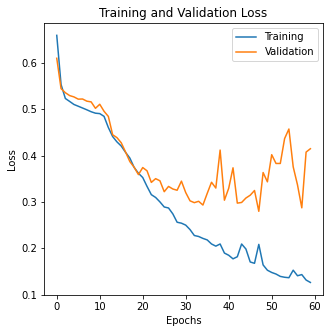

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Training and Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Training","Validation"], loc='upper right')
plt.savefig("/content/drive/MyDrive/Virtual Consultant (FYP)/Covid Tabular Data/Loss of CNN.png",dpi = 1200)
plt.show()

## Training & Validation Accuracy

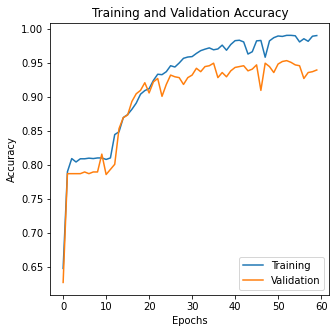

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Training and Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
#plt.legend(["Training","Validation"], loc='lower right')
plt.savefig("/content/drive/MyDrive/Virtual Consultant (FYP)/Covid Tabular Data/Accuracy of CNN.png",dpi = 1200)
plt.show()

## Confusion Matrix

[]

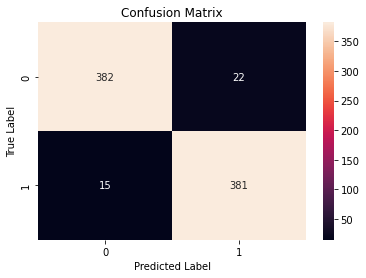

In [ ]:
y_pred_cnn = model.predict([X_test_image,X_test_tabular])
y_pred_cnn = np.round(y_pred_cnn)
y_pred_cnn = np.ravel(y_pred_cnn)

cm = confusion_matrix(Y_test,y_pred_cnn)

sns.heatmap(cm,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.savefig("/content/drive/MyDrive/Virtual Consultant (FYP)/Covid Tabular Data/Confusion Matrix of CNN.png",dpi = 1200)
plt.plot()

#Pre-trained ResNet50

In [ ]:
def pre_trained_model_resnet50(input = (128,128,3)):
  resnet50 = ResNet50(include_top = False, weights="imagenet",input_shape = (128,128,3))

  for layer in resnet50.layers:
    layer.trainable = False
  
  output_base = resnet50.output
  Flat = Flatten()(output_base)
  dense1 = Dense(256,activation = "relu")(Flat)
  dense2 = Dense(128,activation = "relu")(dense1)
  dense3 = Dense(64,activation = "relu")(dense2)


  input_tab = Input(shape = (10,))
  dense4 = Dense(256,activation = "relu")(input_tab)
  dense5 = Dense(128,activation = "relu")(dense4)
  dense6 = Dense(64,activation = "relu")(dense5)

  concat = concatenate([dense3,dense6])

  dense7 = Dense(64,activation = "relu")(concat)
  dense8 = Dense(32,activation = "relu")(dense7)
  output = Dense(1,activation = "sigmoid")(dense8)

  model = Model(inputs = [resnet50.input,input_tab],outputs = output)
  return model

In [ ]:
Pre_trained_Resnet50 = pre_trained_model_resnet50()
Pre_trained_Resnet50.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization

In [ ]:
Pre_trained_Resnet50.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
history = Pre_trained_Resnet50.fit([X_train_image,X_train_tabular],Y_train,epochs = 15,validation_data = ([X_test_image,X_test_tabular],Y_test),batch_size = 128)

Epoch 1/15
25/25 [==============================] - 210s 8s/step - loss: 0.5647 - accuracy: 0.7259 - val_loss: 0.3725 - val_accuracy: 0.7925
Epoch 2/15
25/25 [==============================] - 202s 8s/step - loss: 0.3255 - accuracy: 0.8556 - val_loss: 0.3211 - val_accuracy: 0.8275
Epoch 3/15
25/25 [==============================] - 202s 8s/step - loss: 0.2870 - accuracy: 0.8697 - val_loss: 0.2838 - val_accuracy: 0.8775
Epoch 4/15
25/25 [==============================] - 206s 8s/step - loss: 0.2447 - accuracy: 0.8856 - val_loss: 0.2593 - val_accuracy: 0.8725
Epoch 5/15
25/25 [==============================] - 203s 8s/step - loss: 0.2751 - accuracy: 0.8681 - val_loss: 0.2267 - val_accuracy: 0.9000
Epoch 6/15
25/25 [==============================] - 204s 8s/step - loss: 0.2258 - accuracy: 0.8959 - val_loss: 0.2091 - val_accuracy: 0.9013
Epoch 7/15
25/25 [==============================] - 204s 8s/step - loss: 0.2227 - accuracy: 0.8984 - val_loss: 0.2193 - val_accuracy: 0.8913
Epoch 8/15
25

In [ ]:
Pre_trained_Resnet50.evaluate([X_test_image,X_test_tabular],Y_test)

25/25 [==============================] - 41s 2s/step - loss: 0.1981 - accuracy: 0.9162


[0.1981073021888733, 0.9162499904632568]

## Training & Valiation Loss

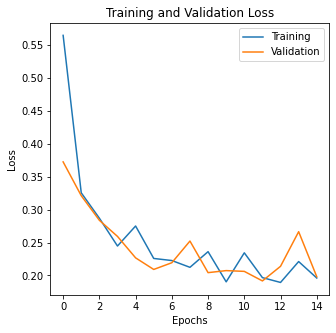

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Training and Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Training","Validation"], loc='upper right')
plt.savefig("/content/drive/MyDrive/Virtual Consultant (FYP)/Covid Tabular Data/Loss of ResNet.png",dpi = 1200)
plt.show()

## Training & Validation Accuracy

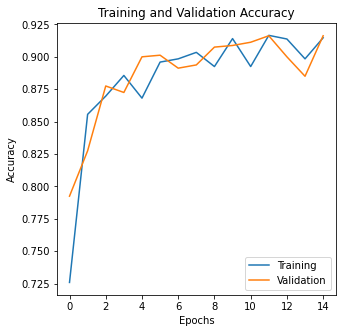

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Training and Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Training","Validation"], loc='lower right')
plt.savefig("/content/drive/MyDrive/Virtual Consultant (FYP)/Covid Tabular Data/Accuracy of ResNet.png",dpi = 1200)
plt.show()

## Confusion Matrix

In [ ]:
y_pred_resnet = Pre_trained_Resnet50.predict([X_test_image,X_test_tabular])
y_pred_resnet = np.round(y_pred_cnn)
y_pred_resnet = np.ravel(y_pred_cnn)

[]

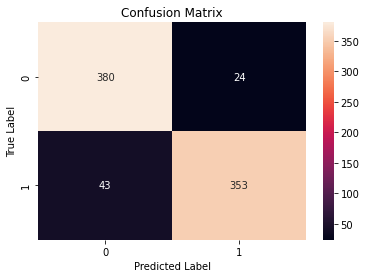

In [ ]:
cm = confusion_matrix(Y_test,y_pred_cnn)

sns.heatmap(cm,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.savefig("/content/drive/MyDrive/Virtual Consultant (FYP)/Covid Tabular Data/Confusion Matrix of ResNet.png",dpi = 1200)
plt.plot()